# 🎲 Lecture 17 – Data 100, Spring 2025

Data 100, Spring 2025

[Acknowledgments Page](https://ds100.org/sp25/acks/)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

ModuleNotFoundError: No module named 'pandas'


---

## A Random Variable $X$

> This section just replicates figures in the lecture. We won't go through it together.

Our probability distribution of $X$, shown as a table:

In [ ]:
# Our random variable X
dist_df = pd.DataFrame({"x": [3, 4, 6, 8],
                        "P(X = x)": [0.1, 0.2, 0.4, 0.3]})
dist_df

,x,P(X = x)
0,3,0.1
1,4,0.2
2,6,0.4
3,8,0.3


In [ ]:
fig = px.bar(dist_df, x="x", y="P(X = x)", title="Distribution of X")
# fig.write_image("distX.png", "png",scale=2)
fig

Let's use this probability distribution to generate a table of $X_i$'s (i.e., simulated draws from the probability distirbution above).

In [ ]:
N = 80000
samples = np.random.choice(
    dist_df["x"], # Draw from these choiecs
    size=N, # This many times
    p=dist_df["P(X = x)"]) # According to this distribution

sim_df = pd.DataFrame({"X": samples})
sim_df

,X
0,8
1,6
2,8
3,8
4,3
...,...
79995,8
79996,4
79997,6
79998,4


<br/><br/>
Let's check how well this simulated sample matches our probability distribution!

In [ ]:
fig = px.histogram(sim_df, x="X", title="Empirical distribution of X", 
                   histnorm="probability")
# fig.write_image("empirical_dist.png", "png",scale=2)
fig

In [ ]:
print("Simulated E[X]:", sim_df['X'].mean())
print("Simulated Var[X]:", sim_df['X'].var())

Simulated E[X]: 5.9060375
Simulated Var[X]: 2.8703194275865953


In [ ]:
E_x = dist_df["x"] @ dist_df["P(X = x)"]
print("E[X]:",E_x)

E[X]: 5.9


In [ ]:
Var_x = dist_df["x"]**2 @ dist_df["P(X = x)"] - E_x**2
print("Var[X]:", Var_x)

Var[X]: 2.8900000000000006


<br/><br/>

---

# 🎲 🎲 Sum of 2 Dice Rolls

> Here's where the lecture demo starts!

Here's the distribution of a single die roll:

In [ ]:
roll_df = pd.DataFrame({"x": [1, 2, 3, 4, 5, 6],
                        "P(X = x)": np.ones(6)/6})
roll_df

,x,P(X = x)
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


In [ ]:
fig = px.bar(roll_df, x="x", y="P(X = x)", title="Distribution of X")
# fig.write_image("die.png", "png",scale=2)
fig

Let $X_1, X_2$ are the outcomes of two dice rolls. Note $X_1$ and $X_2$ are i.i.d. (independent and identically distributed).

Below, we simulate an 80,000-row table of $X_1, X_2$ values. 

The code uses `np.random.choice(arr, size, p)` ([documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)) where `arr` is the array the values and `p` is the probability associated with choosing each value. 

In [ ]:
N = 80000

# roll_df["x"] are the values 1 through 6
# roll_df["P(X=x)"] is a column of a constant 1/6, since all faces are 
# equally likely
sim_rolls_df = pd.DataFrame({
    "X_1": np.random.choice(roll_df["x"], size = N, p = roll_df["P(X = x)"]),
    "X_2": np.random.choice(roll_df["x"], size = N, p = roll_df["P(X = x)"])
})

sim_rolls_df

,X_1,X_2
0,6,6
1,3,4
2,3,4
3,2,5
4,1,6
...,...,...
79995,1,4
79996,1,3
79997,6,3
79998,2,6


We can use our simulated values of $X_1, X_2$ to create new columns $2 X_1$ and $X_1 + X_2$:

In [ ]:
sim_rolls_df['2 X_1'] = 2 * sim_rolls_df['X_1']
sim_rolls_df['X_1 + X_2'] = sim_rolls_df['X_1'] + sim_rolls_df['X_2']
sim_rolls_df

,X_1,X_2,2 X_1,X_1 + X_2
0,6,6,12,12
1,3,4,6,7
2,3,4,6,7
3,2,5,4,7
4,1,6,2,7
...,...,...,...,...
79995,1,4,2,5
79996,1,3,2,4
79997,6,3,12,9
79998,2,6,4,8


Now that we have simulated samples of $2 X_1$ and $X_1 + X_2$, we can plot histograms to see their distributions:


In [ ]:
plot_df = sim_rolls_df[["2 X_1", "X_1 + X_2"]].melt()

# Show 5 random rows of plot_df
display(plot_df.sample(5))

px.histogram(
  plot_df,
  x="value", 
  color="variable", 
  barmode="overlay", 
  histnorm="probability",
  title="Empirical Distributions"
)


,variable,value
128252,X_1 + X_2,10
105628,X_1 + X_2,6
39602,2 X_1,4
136543,X_1 + X_2,7
28592,2 X_1,6


In [ ]:
# The empirical means are nearly identical, but the variance
# of the two rolls is lower than doubling the first roll.
pd.DataFrame([
    sim_rolls_df[["2 X_1", "X_1 + X_2"]].mean().rename("Mean"),
    sim_rolls_df[["2 X_1", "X_1 + X_2"]].var().rename("Var"),
    np.sqrt(sim_rolls_df[["2 X_1", "X_1 + X_2"]].var()).rename("SD")
])

,2 X_1,X_1 + X_2
Mean,7.002925,7.001050
Var,11.707838,5.830897
SD,3.421672,2.414725


<br/><br/>

---

# Which would you pick?

> This is a similar demonstration to the double dice roll above. We won't cover it together during the lecture.

* $\large Y_A = 10 X_1 + 10 X_2 $
* $\large Y_B = \sum\limits_{i=1}^{20} X_i$
* $\large Y_C = 20 X_1$

First let's construct the probability distribution for a single coin. This will let us flip 20 IID coins later.

In [ ]:
# First construct probability distribution for a single fair coin
p = 0.5
coin_df = pd.DataFrame({"x": [1, 0], # [Heads, Tails]
                        "P(X = x)": [p, 1 - p]})
coin_df

,x,P(X = x)
0,1,0.5
1,0,0.5


## Choice A:
$\large Y_A = 10 X_1 + 10 X_2 $

In [ ]:
N = 10000

np.random.rand(N,2) < p

array([[False,  True],
       [False, False],
       [ True,  True],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [ ]:
sim_flips = pd.DataFrame(
    {"Choice A": np.sum((np.random.rand(N,2) < p) * 10, axis=1)})
sim_flips

,Choice A
0,10
1,10
2,10
3,20
4,0
...,...
9995,10
9996,10
9997,10
9998,10


## Choice B:

$\large Y_B = \sum\limits_{i=1}^{20} X_i$

In [ ]:
sim_flips["Choice B"] = np.sum((np.random.rand(N,20) < p), axis=1)
sim_flips

,Choice A,Choice B
0,10,10
1,10,11
2,10,8
3,20,9
4,0,9
...,...,...
9995,10,13
9996,10,11
9997,10,8
9998,10,9


## Choice C:

$\large Y_C = 20 X_1$

In [ ]:
sim_flips["Choice C"] = 20  * (np.random.rand(N,1) < p) 
sim_flips

,Choice A,Choice B,Choice C
0,10,10,20
1,10,11,20
2,10,8,0
3,20,9,20
4,0,9,20
...,...,...,...
9995,10,13,20
9996,10,11,20
9997,10,8,0
9998,10,9,20


<br/>
If you're curious as to what these distributions look like, I've simulated some populations:

In [ ]:
px.histogram(sim_flips.melt(), x="value", facet_row="variable", 
             barmode="overlay", histnorm="probability",
             title="Empirical Distributions",
             width=600, height=600)

In [ ]:
pd.DataFrame([
    sim_flips.mean().rename("Mean"),
    sim_flips.var().rename("Var"),
    np.sqrt(sim_flips.var()).rename("SD")
])

,Choice A,Choice B,Choice C
Mean,10.013000,10.013300,10.076000
Var,49.334764,4.990022,100.004224
SD,7.023871,2.233836,10.000211


______

## Visualizing the Binomial Distribution

> This section replicates figures from the lecture slides. We won't cover it together.

The binomial distribution provides the probability of $y$ successes among $n$ trials,
where each trial has $p$ probability of success:

$$
P(Y=y) = \binom{n}{y} p^y (1-p)^{n-y}
$$

Equivalently, a binomial RV is a sum of $n$ Bernoulli RVs, each with probability $p$ of success.

We can visualize the binomial distribution for different combinations of
$n$ and $p$, as a function of $y$: 

In [ ]:
# Make a grid plots the binomial distribution for p = 0.5 and n = [1, 2, 3, 10, 100]

# np.math.comb(n,k) gives the binomial coefficient for "n choose k"
def binom(n, k, p): 
  return np.math.comb(n, k) * p**k * (1-p)**(n-k)

n_values = [1, 2, 3, 10, 20, 100]

binom_df = pd.DataFrame({
    "n": np.concatenate([[n] * (n+1) for n in n_values]),
    "y": np.concatenate([np.arange(n+1) for n in n_values]),
    "P(Y=y)": [binom(n, y, 0.5) for n in n_values for y in range(n+1)]
})

fig = px.bar(binom_df, x="y", y="P(Y=y)", 
             facet_col="n", facet_col_wrap=3,
             facet_col_spacing=0.1, facet_row_spacing=0.15)

# Show axis ticks on all subplots
fig.update_yaxes(matches=None, showticklabels=True)
fig.update_xaxes(matches=None, showticklabels=True)

# Increase font size
fig.update_layout(font=dict(size=18))

# Increase size of figure
fig.update_layout(width=1000, height=600)

fig.show()



<br/><br/><br/>

---

# From Population to Sample

> This section replicates findings from the lecture. We won't cover it together.

Remember the population distribution we looked at earlier:

In [ ]:
dist_df

,x,P(X = x)
0,3,0.1
1,4,0.2
2,6,0.4
3,8,0.3


In [ ]:
# A population generated from the distribution
N = 100000
all_samples = np.random.choice(dist_df["x"], N, p=dist_df["P(X = x)"])
sim_pop_df = pd.DataFrame({"X": all_samples})
sim_pop_df

,X
0,6
1,6
2,4
3,3
4,6
...,...
99995,6
99996,6
99997,4
99998,8


<br/><br/><br/>
Suppose we draw a sample of size 100 from this giant population.

We are performing **Random Sampling with Replacement:** `df.sample(n, replace=True)` ([link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html))

In [ ]:
n = 100      # Size of our sample
sample_df = (
             sim_pop_df.sample(n, replace=True)
             # Some reformatting below
             .reset_index(drop=True)
             .rename(columns={"X": "X"})
            )
sample_df

,X
0,6
1,8
2,4
3,6
4,6
...,...
95,6
96,4
97,8
98,6


Our **sample distribution** (n = 100):

In [ ]:
px.histogram(sample_df, x="X", histnorm="probability", title="Sample (n = 100)")

<br/>

Compare this to our **original population** (N = 80,000):

In [ ]:
px.histogram(sim_df, x="X", histnorm="probability", title="Population of X")

In [ ]:
pd.DataFrame(
    {"Sample": [sample_df["X"].mean(), sample_df["X"].var(), np.sqrt(sample_df["X"].var())],
     "Population": [sim_df["X"].mean(), sim_df["X"].var(), np.sqrt(sim_df["X"].var())]})

,Sample,Population
0,6.080000,5.906038
1,2.437980,2.870319
2,1.561403,1.694202


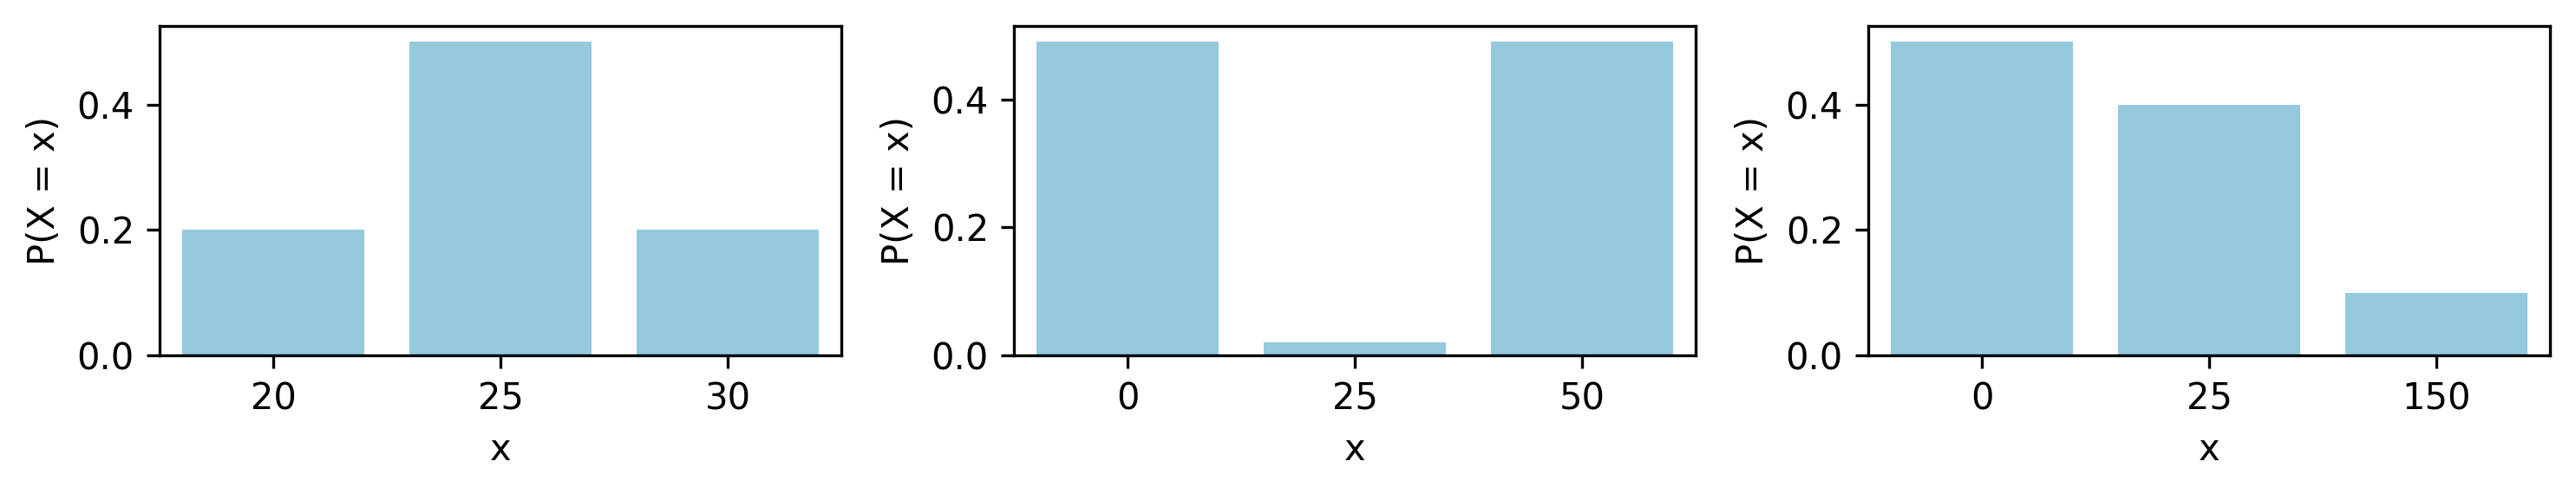

In [ ]:
# Three different distributions of X where E(X)=25

# First distribution
dist1_df = pd.DataFrame({"x": [20, 25, 30],
                         "P(X = x)": [0.2, 0.5, 0.2]})
# Second distribution -- really skewed
dist2_df = pd.DataFrame({"x": [0, 25, 50],
                         "P(X = x)": [0.49, 0.02, 0.49]})
# Third distribution -- skewed left
dist3_df = pd.DataFrame({"x": [0, 25, 150],
                         "P(X = x)": [0.5, 0.4, 0.1]})

fig, axs = plt.subplots(1, 3, figsize=(10, 2))
for i, dist_df in enumerate([dist1_df, dist2_df, dist3_df]):
    sns.barplot(x="x", y="P(X = x)", data=dist_df, ax=axs[i], color="skyblue")

plt.tight_layout()

plt.show()
